# 20MAI0005_Abhishek_Kumar

# Logistic Regression and Naive Bayes Classifier Implementation

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing necessary libraries
# Import the numpy and pandas packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#2 Read a dataset onto a variable

train = pd.read_csv("titanic_data.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#3 Fix the predictor variables 

df = train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [5]:
#4 Change male to 1 and female 0 - Encoding
df["Sex"] = df["Sex"].apply(lambda sex:1 if sex=="male" else 0)

In [6]:
#5 Handling missing values - Data imputation
df["Age"] = df["Age"].fillna(df["Age"].median()) #Outliers

In [7]:
#6 take a look at the dataframe
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [8]:
#7 Set the Predictor(X) and Response(Y) variables
X = df.drop("Survived", axis = 1)
Y = df["Survived"]

In [9]:
#8 Spliting into Training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 25)

In [10]:
#9 Call the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train,Y_train)

LogisticRegression()

In [11]:
#10 Compute the Predctions pr Y^hat
Y_pred = logit.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0
 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1
 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 0 1 0]


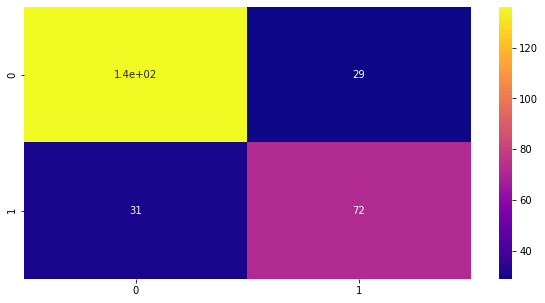

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Figure size
plt.figure(figsize=(10,5))
cm=confusion_matrix(Y_test,Y_pred)
# Heatmap
sns.heatmap(cm, cmap="plasma", annot=True)
plt.show()

In [13]:
#11 Confusion Matrix
cm1=confusion_matrix(Y_test,Y_pred)
cm

array([[136,  29],
       [ 31,  72]], dtype=int64)

In [14]:
#12 Accuracy Score
from sklearn.metrics import accuracy_score,f1_score
print('Accuracy score')
accuracy_score(Y_test,Y_pred)*100

Accuracy score


77.61194029850746

In [15]:
#13 Classification report
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       165
           1       0.71      0.70      0.71       103

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



In [16]:
#14 fitting into Bayes classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, Y_train).predict(X_test)
print(y_pred_gnb)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0
 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0
 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 0 1 1]


In [17]:
#16 Classification report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_gnb)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       165
           1       0.68      0.74      0.71       103

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



# Note:


1.Comparing with the two classifier models Logistic regression and Navies Bayes, Logitic  has been found out with high accuracy of 77.61% and bayes with 76.8%. 
2.Accuracy of Logistic Regression was slightly better than Naive Bayes Classifier.
3.Even not only the accuracy we can see classification report, we can see that other performance metrics are also more of logistic regression as compared with navies bayes